# Hyperparameter space exploration analysis

In [1]:
import json
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

In [2]:
with open('results-month-month-month-ret.json', 'r') as fp:
    data = json.load(fp)

In [3]:
data.keys()

dict_keys(['best', 'trials', 'results', 'best_trial'])

In [4]:
# nr of evaluations
print('Nr of evaluations performed:', len(data['trials']))

Nr of evaluations performed: 1000


In [6]:
# configuration used for hyperparameter space exploration
config = {
    'windowSize': np.arange(9,61),
    'twoLayers': [True,False],
    'batchSize': [32,64],
    'dropout': [0,0.1,0.2,0.3,0.4],
    'neurons': [32,64,128,256]
}

In [7]:
# get all results
allResults = [res['loss'] for res in data['results']]

# extract results
results = {}
for trial in data['trials']:
    res = trial['misc']['vals']
    loss = trial['result']['loss']
    for k in config.keys():
        results.setdefault(k, {})
        results[k].setdefault(res[k][0], [])
        results[k][res[k][0]].append(loss)

In [8]:
results.keys()

dict_keys(['windowSize', 'twoLayers', 'batchSize', 'dropout', 'neurons'])

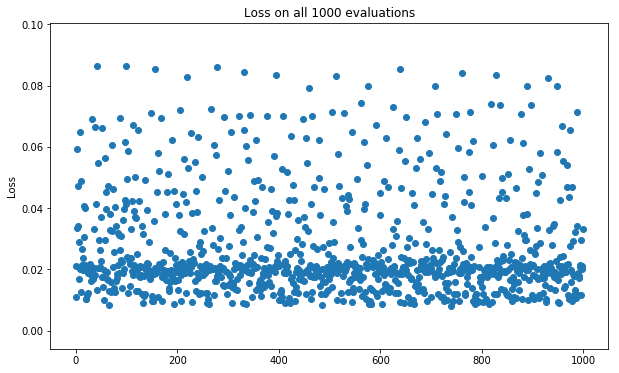

In [9]:
# plot results of all tests
fig, ax = plt.subplots(figsize=(10, 6))
_ = ax.scatter(np.arange(len(allResults)), allResults)
_ = ax.set_title('Loss on all {} evaluations'.format(len(data['trials'])))
_ = ax.set_ylabel('Loss')

In [10]:
results['windowSize'].keys()

dict_keys([51, 26, 3, 12, 6, 13, 14, 32, 31, 49, 7, 18, 46, 38, 47, 44, 48, 24, 39, 35, 19, 25, 23, 45, 36, 1, 16, 20, 28, 22, 11, 4, 43, 9, 34, 0, 5, 27, 41, 21, 17, 40, 29, 42, 2, 33, 37, 30, 15, 10, 50, 8])

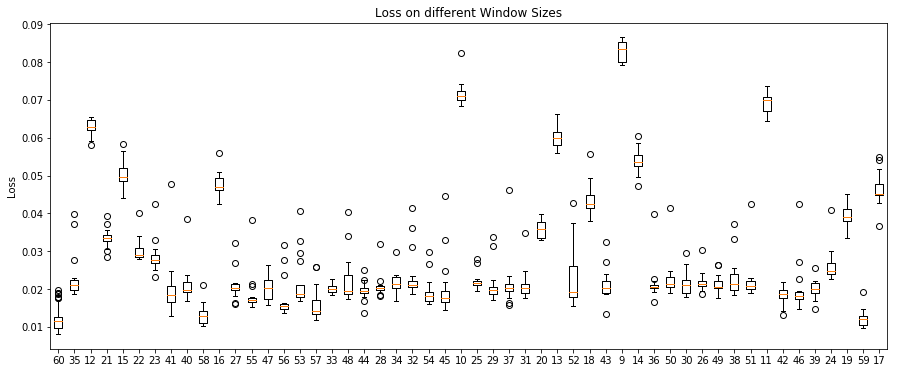

In [11]:
# check loss using different window sizes
fig, ax = plt.subplots(figsize=(15, 6))
orderId = [config['windowSize'][i] for i in results['windowSize'].keys()]
_ = ax.boxplot(results['windowSize'].values())
_ = ax.set_xticklabels(orderId)
_ = ax.set_ylabel('Loss')
_ = ax.set_title('Loss on different Window Sizes')

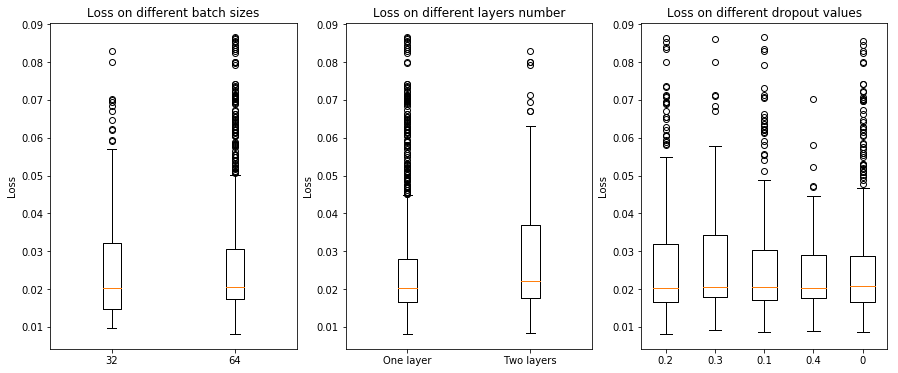

In [12]:
# check loss using different window sizes
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(15, 6))
# batch size
orderId = [config['batchSize'][i] for i in results['batchSize'].keys()]
_ = ax1.boxplot(results['batchSize'].values())
_ = ax1.set_xticklabels(orderId)
_ = ax1.set_ylabel('Loss')
_ = ax1.set_title('Loss on different batch sizes')
# loss with two vs one layers
orderId = [['Two layers', 'One layer'][i] for i in results['twoLayers'].keys()]
_ = ax2.boxplot(results['twoLayers'].values())
_ = ax2.set_xticklabels(orderId)
_ = ax2.set_ylabel('Loss')
_ = ax2.set_title('Loss on different layers number')
# loss with different dropout values
orderId = [config['dropout'][i] for i in results['dropout'].keys()]
_ = ax3.boxplot(results['dropout'].values())
_ = ax3.set_xticklabels(orderId)
_ = ax3.set_ylabel('Loss')
_ = ax3.set_title('Loss on different dropout values')

# Best trial

In [13]:
print('Best trial is achieved using:')
for k in data['best'].keys():
    print('{}: {}'.format(k, config[k][data['best'][k]]))
print()
print('Best trial raw:')
data['best_trial']

Best trial is achieved using:
batchSize: 64
dropout: 0.2
neurons: 256
twoLayers: False
windowSize: 60

Best trial raw:


{'book_time': '2019-01-16 20:54:28.877000',
 'exp_key': None,
 'misc': {'cmd': ['domain_attachment', 'FMinIter_Domain'],
  'idxs': {'batchSize': [740],
   'dropout': [740],
   'neurons': [740],
   'twoLayers': [740],
   'windowSize': [740]},
  'tid': 740,
  'vals': {'batchSize': [1],
   'dropout': [2],
   'neurons': [3],
   'twoLayers': [1],
   'windowSize': [51]},
  'workdir': None},
 'owner': None,
 'refresh_time': '2019-01-16 20:54:45.553000',
 'result': {'loss': 0.008119228295981884, 'status': 'ok'},
 'spec': None,
 'state': 2,
 'tid': 740,
 'version': 0}

# Check 15 best trials
Check hyperparameter values in the first 15 best results to check if there is some consistency

In [14]:
sortedResults = sorted(allResults)
topResults = [res['misc']['vals'] for res in data['trials'] if res['result']['loss'] in sortedResults[:15]]
# convert lists to values
for e in topResults:
    for k,v in e.items():
        if type(v) == type(list()):
            e[k] = v[0]
df = pd.DataFrame(topResults)
df.head()

,batchSize,dropout,neurons,twoLayers,windowSize
0,1,2,3,0,51
1,1,0,3,1,51
2,1,0,3,1,51
3,1,0,3,1,51
4,1,1,3,1,51


In [15]:
for c in df.columns:
    print('## {} ##'.format(c))
    dfs = df[c].value_counts().to_frame()
    dfs.columns = ['Counts']
    dfs.index.name = 'Values'
    print(dfs)
    print()

## batchSize ##
        Counts
Values        
1           15

## dropout ##
        Counts
Values        
0           10
2            2
1            2
4            1

## neurons ##
        Counts
Values        
3           15

## twoLayers ##
        Counts
Values        
1           13
0            2

## windowSize ##
        Counts
Values        
51          15

